In [1]:
import cv2

In [17]:
img=cv2.imread('first.jpg')

In [19]:
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
img.shape

(683, 1023, 3)

In [15]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [20]:
cv2.imshow('webcam',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
gray.shape

(683, 1023)

In [29]:
type(gray[0][0])

numpy.uint8

In [34]:
hs= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow('window 1',hs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
hs.shape

(683, 1023, 3)

In [39]:
vid = cv2.VideoCapture('video.mp4')
while True:
    try:
        _,frame= vid.read()
        cv2.imshow('window2',frame)
    except :
        pass
    if cv2.waitKey(1)==ord('q'):
        break;
        
cv2.destroyAllWindows()

In [42]:
img[0]

array([[237, 234, 230],
       [238, 235, 231],
       [236, 234, 233],
       ...,
       [109, 108, 112],
       [108, 107, 111],
       [108, 107, 111]], dtype=uint8)

# Lect 2

In [2]:
img=cv2.imread('photo.jpg')
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
reImg = cv2.resize(img,(700,500))
cv2.imshow('webcam',reImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
gray= cv2.cvtColor(reImg,cv2.COLOR_BGR2GRAY)
cv2.imshow('webcam',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
canny_img= cv2.Canny(gray,80,80)
cv2.imshow('Ankit',canny_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
import numpy as np
kernel = np.ones((1,3),'uint8')
erode= cv2.erode(canny_img,kernel,iterations=1)
cv2.imshow('Ankit',erode)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
kernel = np.ones((2,2),'uint8')
dilate= cv2.dilate(erode,kernel,iterations=3)
cv2.imshow('Ankit',dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

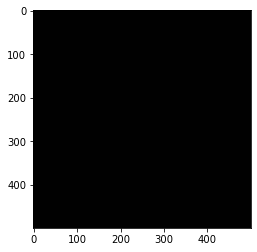

In [30]:
import numpy as np
from matplotlib import pyplot as plt
blank = np.ones((500,500,3),'uint8')
plt.imshow(blank)

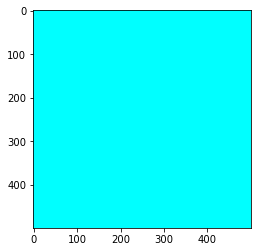

In [33]:
blank[:] = [0,255,255]
plt.imshow(blank)

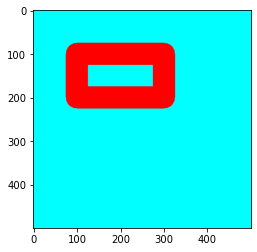

In [18]:
cv2.rectangle(blank,(100,100),(300,200),(255,0,0),50)
plt.imshow(blank)

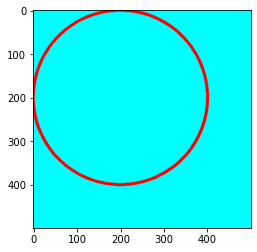

In [34]:
plt.imshow(cv2.circle(blank,(200,200),200,(255,0,0),5))


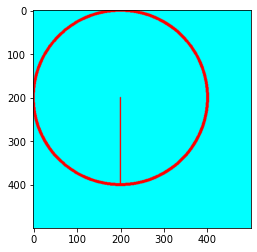

In [23]:
img3=cv2.line(blank,(200,200),(200,400),(255,0,0),2)
plt.imshow(img3)


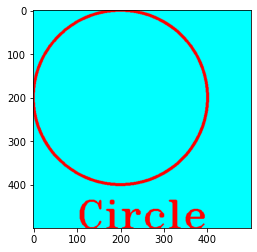

In [35]:
cv2.putText(blank,"Circle",(100,500),cv2.FONT_HERSHEY_TRIPLEX,3,(255,0,0),3)
plt.imshow(blank)

In [39]:
vid = cv2.VideoCapture(0)
while True:
    try:
        _,frame= vid.read()
        cv2.imshow('window2',frame)
    except :
        pass
    if cv2.waitKey(1)==ord('q'):
        break;
        
cv2.destroyAllWindows()

Color Detection

In [22]:
import numpy as np
vid = cv2.VideoCapture(0)
while(1 ) :
    _,frame= vid.read()
    frame = cv2.flip(frame,1)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    red_L =np.array([50,85,110],'uint8')
    red_U = np.array([60,250,250],'uint8')
    redM = cv2.inRange(hsv,red_L,red_U)
    kernel = np.ones((5,5),'uint8')
    redM = cv2.dilate(redM,kernel)
    conts,_ = cv2.findContours(redM,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cont in conts :
        area = cv2.contourArea(cont)
        if(area>100) :
            x,y,w,h =cv2.boundingRect(cont)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(frame,"Red Color",(x,y),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255))
    cv2.imshow("win1",frame)
    if cv2.waitKey(1)==ord('q'):
        break;
        
cv2.destroyAllWindows()

# Lec 3

Mediapipe Intro

In [1]:
!pip install mediapipe

  Using cached opencv_contrib_python-4.5.5.62-cp36-abi3-win_amd64.whl (42.2 MB)


In [14]:
import mediapipe as mp
import cv2
import numpy as np

In [15]:
drawing_details = mp.solutions.drawing_utils
hands_details= mp.solutions.hands

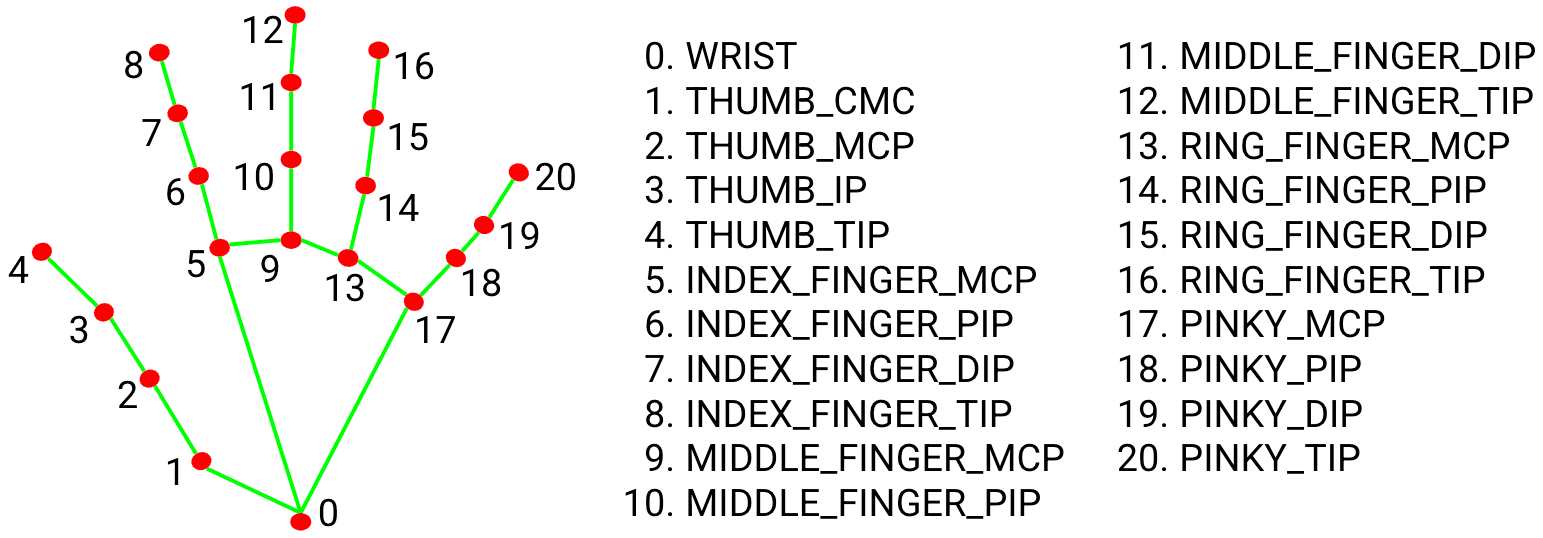

In [17]:
mp_face_detection = mp.solutions.face_detection
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    img=cv2.imread('first.jpg')
    res = face_detection.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    if  res.detections :
        for detection in res.detections :
            drawing_details.draw_detection(img,detection)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
cap = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        res = face_detection.process(frame)
        if  res.detections :
            for detection in res.detections :
                drawing_details.draw_detection(frame,detection)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

face Mesh 

In [19]:
mp_mesh_detection = mp.solutions.face_mesh
with mp_mesh_detection.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5) as mesh_detection:
    img=cv2.imread('photo.jpg')
    res = mesh_detection.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    if  res.multi_face_landmarks:
        for mesh in res.multi_face_landmarks :
            drawing_details.draw_landmarks(img, landmark_list=mesh)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
mp_mesh_detection = mp.solutions.face_mesh
cap = cv2.VideoCapture(0)
with mp_mesh_detection.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5) as mesh_detection:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        res =  mesh_detection.process(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
        if  res.multi_face_landmarks :
            for mesh in res.multi_face_landmarks :
                drawing_details.draw_landmarks(frame,mesh)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

In [21]:
mp_hands= mp.solutions.hands
with mp_hands.Hands(min_detection_confidence=0.5,min_tracking_confidence=0.5) as hands:
    img=cv2.imread('first.jpg')
    res = hands.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    if  res.multi_hand_landmarks:
        for mesh in res.multi_hand_landmarks :
            drawing_details.draw_landmarks(img,mesh)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Hand Detection

In [4]:
cap = cv2.VideoCapture(0)
mp_hands= mp.solutions.hands
with mp_hands.Hands(min_detection_confidence=0.5,min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        res = hands.process(frame)
        if  res.multi_hand_landmarks :
            for mesh in res.multi_hand_landmarks :
                drawing_details.draw_landmarks(frame,mesh,mp_hands.HAND_CONNECTIONS)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

In [28]:
cap = cv2.VideoCapture(0)
mp_hands= mp.solutions.hands
with mp_hands.Hands(min_detection_confidence=0.2,min_tracking_confidence=0.2) as hands:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        res = hands.process(frame)
        frame_height,frame_width,_ = frame.shape
        if  res.multi_hand_landmarks :
            for mesh in res.multi_hand_landmarks :
#                 print('hand_landmarks:',mesh)     #to print the coordinates of index finger
#                 print(
#                       f'Index finger tip coordinates: (',
#                       f'{mesh.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * frame_width}, '
#                       f'{mesh.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * frame_height})'
#                      )
                drawing_details.draw_landmarks(frame,mesh,mp_hands.HAND_CONNECTIONS)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

Pose

In [23]:
mp_pose = mp.solutions.pose
with mp_pose.Pose(min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:
    img=cv2.imread('first.jpg')
    res = pose.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    if  res.pose_landmarks:
        drawing_details.draw_landmarks(img,res.pose_landmarks,mp_pose.POSE_CONNECTIONS)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
cap = cv2.VideoCapture(0)
mp_pose= mp.solutions.pose
with mp_pose.Pose(min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        res = pose.process(frame)
        if  res.pose_landmarks :
            drawing_details.draw_landmarks(frame,res.pose_landmarks,mp_pose.POSE_CONNECTIONS)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

Holistic

In [25]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    img=cv2.imread('first.jpg')
    results = holistic.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    image_height,image_width,_ =img.shape
#     mp_drawing.draw_landmarks(
#         img, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(
       img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
cap = cv2.VideoCapture(0)
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_pose= mp.solutions.pose
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        results = holistic.process(frame)
        mp_drawing.draw_landmarks(
           frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(
            frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

In [27]:
cap.release()